## Unveiling LSTMs

LSTMs, or Long Short-Term Memory units, are a type of recurrent neural network (RNN) designed to recognize patterns in sequences. Using PyTorch, a popular open-source machine learning library, we can easily implement and train these powerful sequence models.

## Part 1:  Data Preparation for Sequential Predictive Modeling

We will use Fitbit refined dataset: https://www.kaggle.com/datasets/athul3000/fitbit-refined-data for this exercise. For the purposes of demonstartion, Hourlymerged.csv data, which is hourly aggregated data related to physical activities and metrics such as Calories, TotalIntensity, AverageIntensity and Step-Total, would be used. 

## Data Exploration

We start with Summary Statistics. In the context of data analysis, using summary statistics is a foundational step. They allow you to quickly grasp the main features of your data before diving into more detailed analysis or modeling.

## Summary Statistics

In [7]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '2022_04_22_hour_heartbeat_merged.csv' 
df = pd . read_csv ( file_path )

# Display summary statistics
df . describe ()

,Beats,Id,Intensity,Steps
count,6252.000000,6.252000e+03,6246.000000,6246.000000
mean,73.845170,5.638328e+09,16.101185,431.416747
std,14.799422,1.864900e+09,25.190960,811.960176
min,46.000000,2.022484e+09,0.000000,0.000000
25%,63.000000,4.558610e+09,0.000000,0.000000
50%,71.000000,5.577150e+09,7.000000,130.000000
75%,81.000000,6.962181e+09,22.000000,542.000000
max,167.000000,8.877689e+09,180.000000,10554.000000


## Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, it provides an accessible way to see and understand patterns, outliers, and trends in data.

For this exercise, we would visualize some time series plots and then some histograms (to observe distributions).

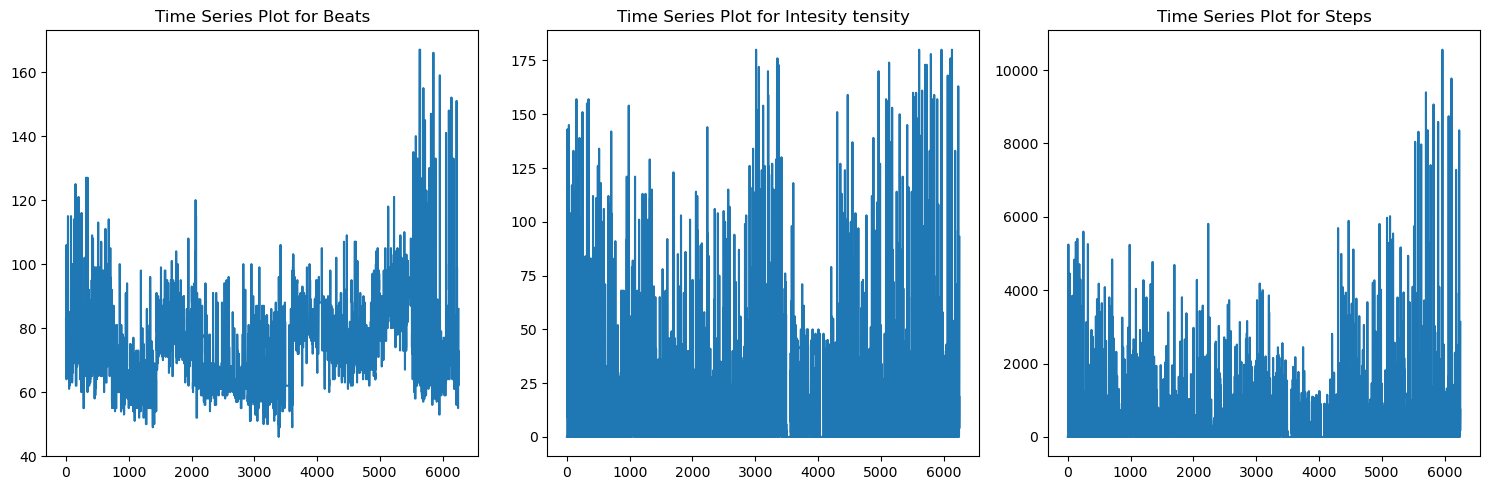

In [10]:
#Import necessary libraries
import matplotlib . pyplot as plt

# Time series plots
plt . figure ( figsize =(15 , 5) )

# Plot for Beats
plt . subplot (1 , 3 , 1)
plt . plot ( df ['Beats'])
plt . title ( 'Time Series Plot for Beats')

# Plot for Intensity
plt . subplot (1 , 3 , 2)
plt . plot ( df ['Intensity'])
plt . title ( 'Time Series Plot for Intesity')

# Plot for Steps
plt . subplot (1 , 3 , 3)
plt . plot ( df ['Steps'])
plt . title ('Time Series Plot for Steps')

plt . tight_layout ()

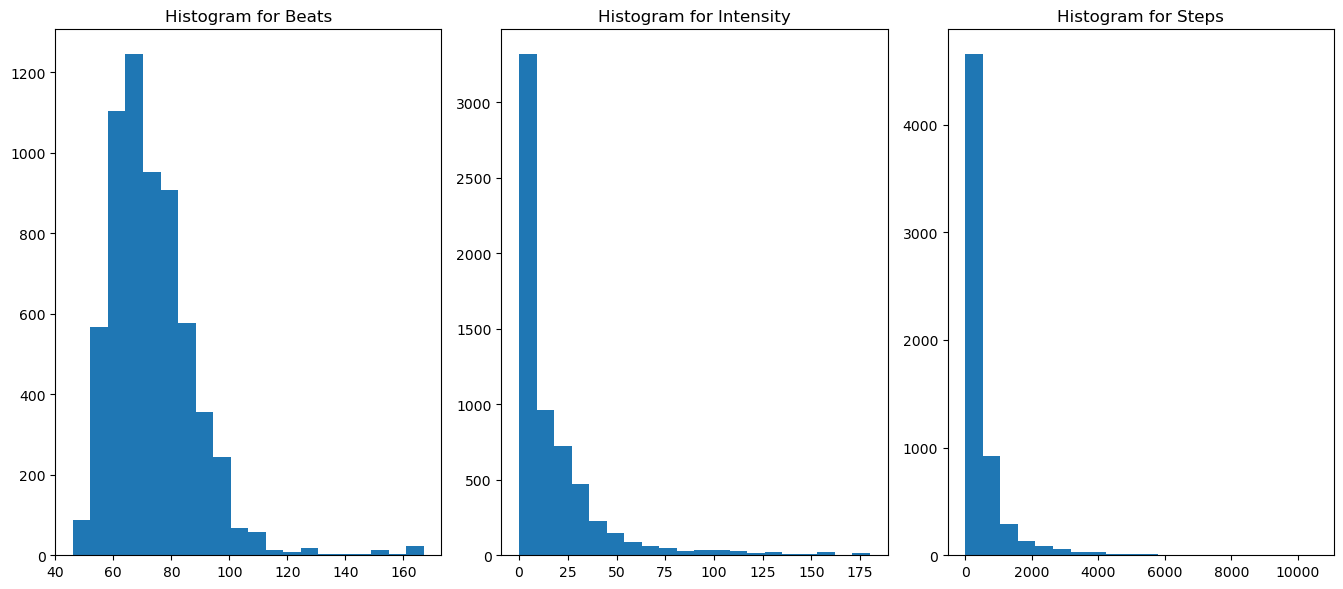

In [11]:
 #Histograms to observe distributions
plt . figure ( figsize =(18 , 6) )

# Histogram for Beats
plt . subplot (1 , 4 , 1)
plt . hist ( df ['Beats'] , bins =20)
plt . title ('Histogram for Beats')

# Histogram for Intensity
plt . subplot (1 , 4 , 2)
plt . hist ( df ['Intensity'] , bins =20)
plt . title ('Histogram for Intensity')


# Histogram for Steps
plt . subplot (1 , 4 , 3)
plt . hist ( df ['Steps'] , bins =20)
plt . title ('Histogram for Steps')

plt . tight_layout ()
plt . show ()

## Data Preprocessing

Data preprocessing is the act of cleaning and transforming raw data into a format suitable for analysis or modeling. This often includes handling missing values, normalizing data, and encoding categorical variables.

The first step in data preprocessing is to identify and handle any missing values. 

## Missing Value Treatment

Missing value treatment involves identifying, assessing, and addressing data gaps or null values in a dataset. Common strategies include imputation, deletion, or using algorithms robust to missing data.

In [12]:
# Check for missing values
df.isnull().sum ()

# Load the CSV file into a DataFrame
file_path = '2022_04_22_hour_heartbeat_merged.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull()

# Use .any(axis=1) to check for any missing values in each row
rows_with_missing_values = missing_values.any(axis=1)

# Get the rows with missing values
rows_with_missing_data = df[rows_with_missing_values]

# Print or inspect the rows with missing values
print(rows_with_missing_data)

               time  Beats          Id  Intensity  Steps
2901  2016-05-12 10     78  5553957443        NaN    NaN
2902  2016-05-12 11     78  5553957443        NaN    NaN
2903  2016-05-12 12     56  5553957443        NaN    NaN
3611  2016-05-11 12     56  5577150313        NaN    NaN
4199  2016-05-09 12     83  6117666160        NaN    NaN
4931  2016-05-12 12     67  6962181067        NaN    NaN


Hourly_merged.csv has no missing values

## Data Scaling/Normalization

Data scaling or normalization adjusts the range of feature values to ensure consistency, often converting them to a standard scale (e.g., 0 to 1). This aids in faster convergence and improved performance in many algorithms.

Min-Max scaling is a commonly used data scaling method. Min-Max Scaling is a method to resize features into a specific range, typically [0, 1]. It's calculated using the formula:
Scaled Value=(Value−Min)/(Max−Min)
This ensures that the scaled data retains its original distribution while being bounded within the set range.

In [13]:
# Import MinMaxScaler
from sklearn . preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler ()

# Fit and transform the dataset
df_scaled = pd . DataFrame ( scaler . fit_transform ( df [['Beats','Intensity','Steps']]) , columns =['Beats', 'Intensity','Steps'])

# Display the first few rows of the scaled dataset
df_scaled . head ()


,Beats,Intensity,Steps
0,0.305785,0.0,0.0
1,0.264463,0.0,0.0
2,0.165289,0.0,0.0
3,0.181818,0.0,0.0
4,0.181818,0.0,0.0


## Visualising the scaled data

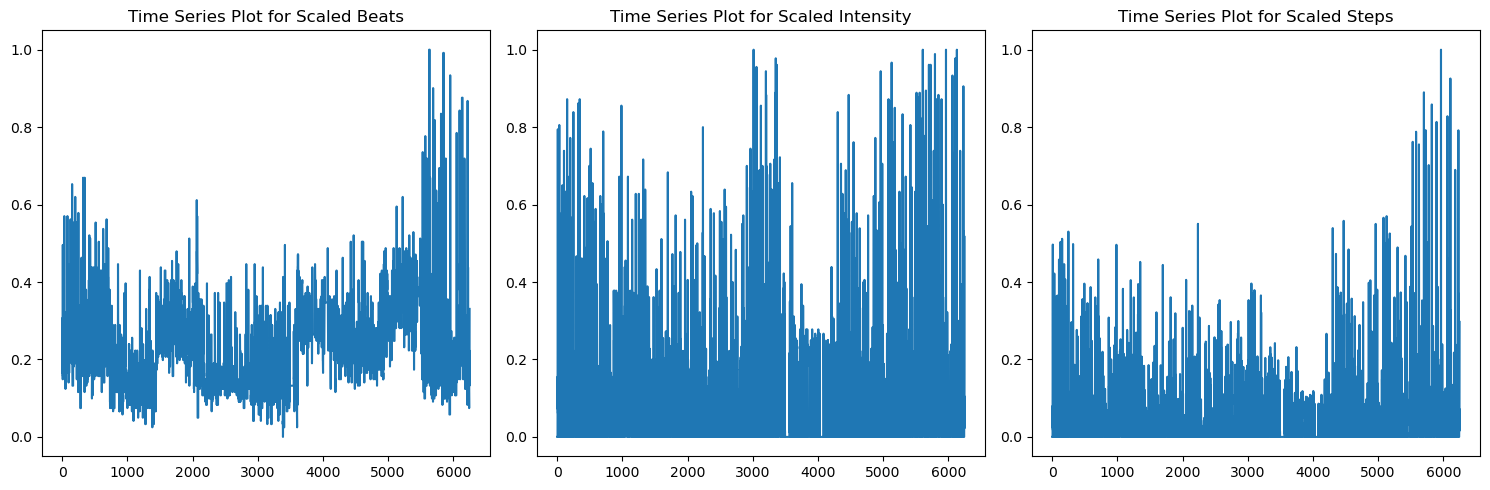

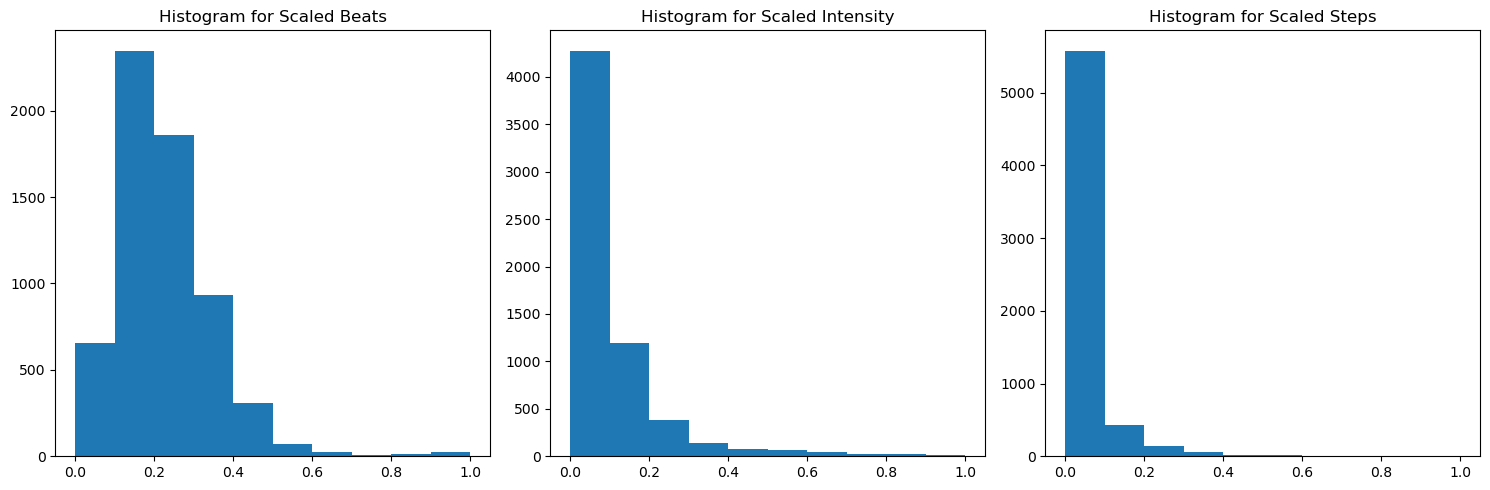

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a DataFrame
file_path = '2022_04_22_hour_heartbeat_merged.csv'
df = pd.read_csv(file_path)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Beats', 'Intensity', 'Steps']])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=['Scaled Beats', 'Scaled Intensity', 'Scaled Steps'])

# Time series plots
plt.figure(figsize=(15, 5))

# Plot for Scaled Beats
plt.subplot(1, 3, 1)
plt.plot(df_scaled['Scaled Beats'])
plt.title('Time Series Plot for Scaled Beats')

# Plot for Scaled Intensity
plt.subplot(1, 3, 2)
plt.plot(df_scaled['Scaled Intensity'])
plt.title('Time Series Plot for Scaled Intensity')

# Plot for Scaled Steps
plt.subplot(1, 3, 3)
plt.plot(df_scaled['Scaled Steps'])
plt.title('Time Series Plot for Scaled Steps')

plt.tight_layout()

# Histograms for scaled data
plt.figure(figsize=(15, 5))

# Histogram for Scaled Beats
plt.subplot(1, 3, 1)
plt.hist(df_scaled['Scaled Beats'])
plt.title('Histogram for Scaled Beats')

# Histogram for Scaled Intensity
plt.subplot(1, 3, 2)
plt.hist(df_scaled['Scaled Intensity'])
plt.title('Histogram for Scaled Intensity')

# Histogram for Scaled Steps
plt.subplot(1, 3, 3)
plt.hist(df_scaled['Scaled Steps'])
plt.title('Histogram for Scaled Steps')

plt.tight_layout()